# Исследование надежности заемщиков - анализ банковских данных

## Описание проекта

*Цели и задачи проекта*

На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок.

Ответим на несколько вопросов:

- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Падает ли количество кредитов в зависимости от количества детей у заёмщика?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как изменяются доходы со временем?
- Влияет ли образование на уровень дохода и наличие задолженности?
- Различается ли общий доход должников и ответственных заёмщиков?

*Данные*

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

*План*

- предобработка данных
- исследование
- вывод

## Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('/Users/porphyrion/Desktop/PRACTICUM/my_projects/datasets/data_credit.csv')

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце мы обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [7]:
data['days_employed'] = data['days_employed'].abs()

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Оставим данные без изменений, этот столбец не понадобится для исследования.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [15]:
data['education'] = data['education'].str.lower()

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Исследуем данные и ответим на вопросы

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Исследуем зависимость между количеством детей и возвратом кредита в срок. Сгруппируем данные по количеству детей и посчитаем количество клиентов, количество должников и долю должников для каждой категории.

In [23]:
data_pivot = data.pivot_table(index=['children'], values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot

,count,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


**Вывод:** видна зависимость возврата кредита в срок от количества детей. Среди клиентов с двумя детьми примерно 9.5% должников, среди клиентов с одним ребенком - 9.2%. Меньше всего задержек по выплате кредита среди бездетных клиентов, доля дожников в этой категории всего 7.5%.

Кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительное финансовое бремя, и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности оплачивать в срок.

Для более точных выводов не хватает данных по клиентам с тремя и более детьми. Выборка не сбалансирована, классы в выборке имеют разные размеры.

#### Падает ли количество кредитов в зависимости от количества детей у заёмщика?

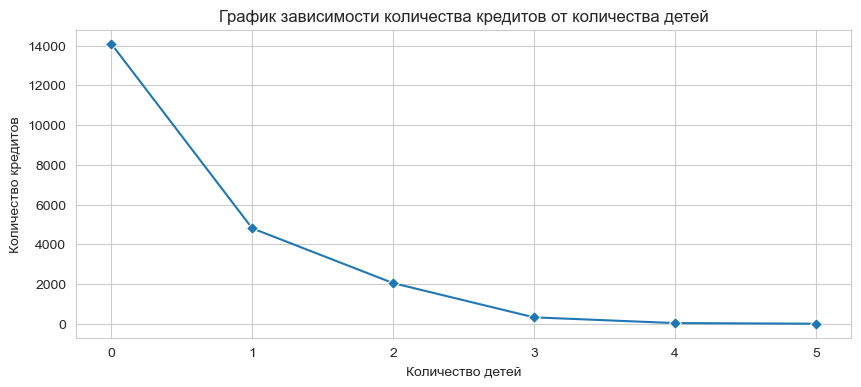

In [24]:
data_ch = data.groupby('children')[['children']].count()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='D')
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
plt.show()

**Вывод:** из графика видно видно, как падает число выданных кредитов в зависимости от числа детей в семье заёмщика. Возможно, это не связано с тем, что многодетные семьи реже берут кредиты. Скорее всего, семей без детей или с 1–2 детьми намного больше, чем многодетных. В таком случае стоит рассматривать относительные величины.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Исследуем зависимость возврата кредита в срок от семейного положения. Для этого сгруппируем данные по семейному положению и посчитаем количество клиентов, количество должников и долю должников для каждой категории.

In [25]:
data_pivot = data.pivot_table(index=['family_status'], values='debt', aggfunc= ['count', 'sum', 'mean'])
data_pivot

,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


**Вывод:** прослеживается зависимость возврата кредита в срок от семейного положения. 
Так неженатые/незамужние клиенты и клиенты, находящиеся в гражданском браке чаще других задерживают выплаты по кредитам, на них приходится 9.8% и 9.3% задолженностей соответственно.
Женатые/замужние клиенты, клиенты в разводе и вдовы/вдовцы менее вероятно становятся должниками, на них приходится 7.5%, 7% и 6.6% соответственно.

Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные.

#### Как разные цели кредита влияют на его возврат в срок?

Чтобы понять, как разные цели влияют на возврат кредита в срок, сгруппируем данные по целям кредита и рассчитаем количество кредитов, количество должников и долю должников для каждой группы.

In [26]:
data_pivot = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot

,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


**Вывод:** зависимость прослеживается, однако разница невелика и составляет всего 2%. 
Так на операции с автомобилем и получение образования приходится 9.3% и 9.3% соответственно.
Несущественно ниже доля должников в категориях "операции с недвижимостью" и "проведение свадьбы" - 7.3% и 7.9% соответственно.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Исследуем зависимость возврата кредита в срок от уровня дохода. Для этого сгруппируем данные по уровню дохода и посчитаем количество клиентов, количество должников и долю должников для каждой категории.

In [27]:
data_pivot = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot

,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


#### Как изменяются доходы со временем?

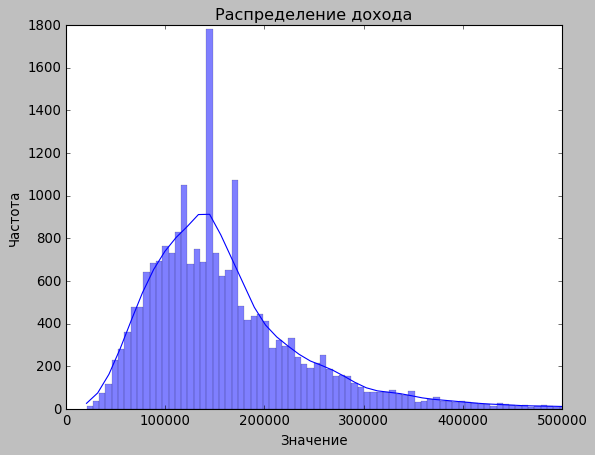

In [28]:
plt.style.use('classic')
sns.histplot(x='total_income', data=data, kde=True)
plt.xlim(0, 500000)
plt.title('Распределение дохода')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

**Вывод:** выборка по заемщикам, как с наименьшим доходом, так и с наибольшим крайне недостаточна для формирования однозначных выводов. 

Зависимость возврата кредита в срок от уровня дохода подтверждена частично, для более точных выводов необходимо больше информации о клиентах категорий A (от 1 млн руб), D (30-50 тыс руб), E (до 30 тыс руб). 
Доля должников среди клиентов категории B (доход 200001–1000000 руб) - 7%, категории C (50001 - 200000 руб) - 8,5%.


#### Влияет ли образование на уровень дохода и наличие задолженности?

In [29]:
# столбец с меткой о задолженности заменяем на более читаемый
data['debt'] = data['debt'].apply(lambda x: 'должник' if x == 1 else 'не должник')

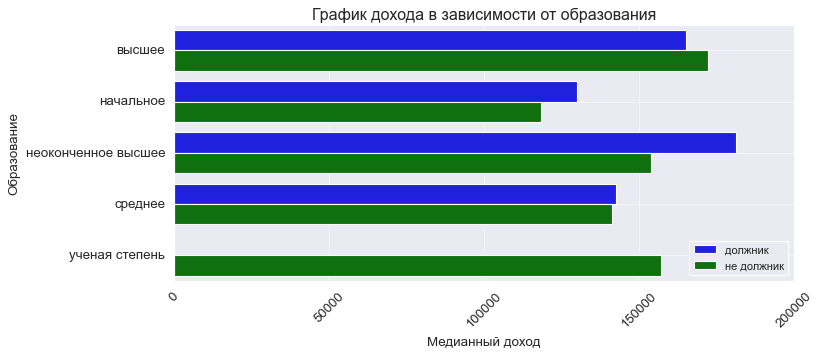

In [30]:
data_ed = data.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()
sns.set_style('dark')
plt.figure(figsize=(10, 4))
sns.barplot(x='total_income', y='education', data=data_ed, hue='debt')
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

**Вывод**: должниками бывают люди и с высшим, и с начальным образованием. Однако среди людей с учёной степенью должников нет вообще.

#### Различается ли общий доход должников и ответственных заёмщиков?

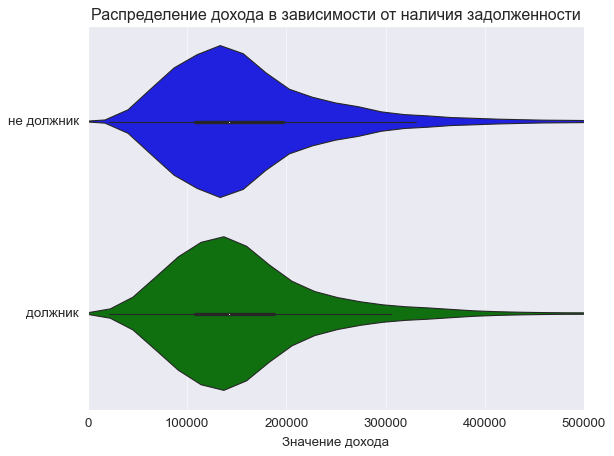

In [31]:
sns.set_style('darkgrid')
sns.violinplot(x='total_income', y='debt', data=data)
plt.xlim(0, 500000)
plt.title('Распределение дохода в зависимости от наличия задолженности')
plt.xlabel('Значение дохода')
plt.ylabel(None)
plt.show()

**Вывод:** распределения похожи. Если доход и различается, то незначительно.

### Общий вывод.

На основе данных о статистике платежеспособности клиентов нами был произведен анализ влияния на возврат кредита в срок различных факторов, таких, как семейное положение, количество детей, уровень дохода и цель кредита. Результаты исследования будут учтены при создании системы кредитного скоринга.

Для проведения исследования было представлено **4 гипотезы**:
- количество детей влияет на платежеспособность клиентов,
- семейное положение влияет на платежеспособность клиентов,
- уровень дохода влияет на платежеспособность клиентов,
- цель кредита влияет на платежеспособность клиентов.

**Гипотеза 1** частично подтверждена.
Для более точных выводов необходимо больше статистических данных по клиентам с 3, 4 и 5 детьми.

- 7.5% - доля просроченных кредитов у клиентов без детей,
- 9.2% - доля просроченных кредитов у клиентов с 1 ребенком,
- 9.5% - доля просроченных кредитов у клиентов с 2 детьми,

Рекомендация: провести дополнительное исследование на большей выборке данных.

**Гипотеза 2** подтверждена.

- 9.8% и 9.3% - неженатые/незамужние клиенты и клиенты, находящиеся в гражданском браке чаще других задерживают выплаты по кредитам,
- 7.5%, 7% и 6.6% - соответственно женатые/замужние клиенты, клиенты в разводе и вдовы/вдовцы менее вероятно становятся должниками.

**Гипотеза 3** частично подтверждена.
Для более точных выводов необходимо больше информации о клиентах категорий A (от 1 млн руб), D (30-50 тыс руб), E (до 30 тыс руб). 

- 7% - доля должников среди клиентов категории B (доход 200001–1000000 руб),
- 8.5% - доля должников среди клиентов категории C (50001 - 200000 руб).

Рекомендация: провести дополнительное исследование на большей выборке данных.

**Гипотеза 4** подтверждена.

- 9.3% доля просроченных кредитов на операции с автомобилем,
- 9.3% доля просроченных кредитов на получение образования,
- 7.9% доля просроченных кредитов на проведение свадьбы,
- 7.3% доля просроченных кредитов на операции с недвижимостью.

Общие рекомендации:
- Специалистам по построению модели кредитного скоринга рекомендуется использовать результаты второй и четвертой гипотезы.
- Необходимо собрать больше статистических данных для проверки первой и третьей гипотез.